In [1]:
# استيراد المكتبات و قراءات البيانات 
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
# استكشاف البيانات 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
dataset = df['dataset'].unique()
cp  = df['cp'].unique()
restecg = df['restecg'].unique()
slope = df['slope'].unique()
thal = df['thal'].unique()

print(dataset)
print(cp)
print(restecg)
print(slope)
print(thal)

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
['downsloping' 'flat' 'upsloping' nan]
['fixed defect' 'normal' 'reversable defect' nan]


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
df.drop(['id','ca','thal'], axis =1 ,inplace = True)

In [7]:
import warnings
warnings.simplefilter(action = 'ignore' , category = FutureWarning)

In [8]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [9]:
mode_valu1 = df['fbs'].mode()[0]
df['fbs'] = df['fbs'].fillna(mode_valu1)
mode_valu2 = df['exang'].mode()[0]
df['exang'] = df['exang'].fillna(mode_valu2)
mode_valu3 = df['slope'].mode()[0]
df['slope'] = df['slope'].fillna(mode_valu3)
mode_valu4 = df['restecg'].mode()[0]
df['restecg'] = df['restecg'].fillna(mode_valu4)

In [10]:
df.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder() # تحويل البقيم النصية الي ارقام 
le_sex.fit(df['sex']) 

le_dataset = preprocessing.LabelEncoder()
le_dataset.fit(df['dataset']) 

le_cp = preprocessing.LabelEncoder()
le_cp.fit(df['cp']) 

le_restecg = preprocessing.LabelEncoder()
le_restecg.fit(df['restecg']) 

le_slope = preprocessing.LabelEncoder()
le_slope.fit(df['slope']) 

# انشاء اعمدة جديدة تحتوي على النسخ الرقمية 
df['sex_num'] = le_sex.transform(df['sex']) 
df['dataset_num'] = le_dataset.transform(df['dataset']) 
df['cp_num'] = le_cp.transform(df['cp']) 
df['restecg_num'] = le_restecg.transform(df['restecg']) 
df['slope_num'] = le_slope.transform(df['slope']) 
# حذف العمدة الاصلية 
df=df.drop(columns=['sex','dataset','cp','restecg','slope'])
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_num,dataset_num,cp_num,restecg_num,slope_num
0,63,145.0,233.0,True,150.0,False,2.3,0,1,0,3,0,0
1,67,160.0,286.0,False,108.0,True,1.5,2,1,0,0,0,1
2,67,120.0,229.0,False,129.0,True,2.6,1,1,0,0,0,1
3,37,130.0,250.0,False,187.0,False,3.5,0,1,0,2,1,0
4,41,130.0,204.0,False,172.0,False,1.4,0,0,0,1,0,2


In [13]:
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_num,dataset_num,cp_num,restecg_num,slope_num
0,63,145.0,233.0,1,150.0,0,2.3,0,1,0,3,0,0
1,67,160.0,286.0,0,108.0,1,1.5,2,1,0,0,0,1
2,67,120.0,229.0,0,129.0,1,2.6,1,1,0,0,0,1
3,37,130.0,250.0,0,187.0,0,3.5,0,1,0,2,1,0
4,41,130.0,204.0,0,172.0,0,1.4,0,0,0,1,0,2


In [14]:
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [15]:
df['target'] = (df['num'] > 0 ).astype(int)
df.drop(['num'], axis =1 ,inplace = True)
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_num,dataset_num,cp_num,restecg_num,slope_num,target
0,63,145.0,233.0,1,150.0,0,2.3,1,0,3,0,0,0
1,67,160.0,286.0,0,108.0,1,1.5,1,0,0,0,1,1
2,67,120.0,229.0,0,129.0,1,2.6,1,0,0,0,1,1
3,37,130.0,250.0,0,187.0,0,3.5,1,0,2,1,0,0
4,41,130.0,204.0,0,172.0,0,1.4,0,0,1,0,2,0


In [16]:
#وجود قيم تساوي صفر نحذفها  
df = df[df['trestbps'] != 0]
#وجود قيم سالبة يجب حذفها 
df = df[df['oldpeak'] >= 0]
#وجود قيم تساوي صفر يجب حذفها
chol_median = df[df['chol'] > 0]['chol'].median()
df.loc[df['chol'] == 0 , 'chol'] = chol_median

In [17]:
df.tail(310)

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_num,dataset_num,cp_num,restecg_num,slope_num,target
597,32,95.000000,236.0,0,127.000000,0,0.700000,1,2,3,1,2,1
598,34,115.000000,236.0,0,154.000000,0,0.200000,1,2,0,1,2,1
599,35,132.132404,236.0,0,130.000000,1,0.878788,1,2,0,1,1,1
600,36,110.000000,236.0,0,125.000000,1,1.000000,1,2,0,1,1,1
601,38,105.000000,236.0,0,166.000000,0,2.800000,0,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.000000,333.0,1,154.000000,0,0.000000,0,3,0,2,1,1
916,62,132.132404,139.0,0,137.545665,0,0.878788,1,3,3,2,1,0
917,55,122.000000,223.0,1,100.000000,0,0.000000,1,3,0,2,1,1
918,58,132.132404,385.0,1,137.545665,0,0.878788,1,3,0,0,1,0


In [18]:
df.describe()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_num,dataset_num,cp_num,restecg_num,slope_num,target
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.508269,132.526805,243.356020,0.152150,137.733199,0.368247,0.903732,0.786108,1.224917,0.779493,0.986770,1.151047,0.550165
std,9.438466,17.879142,52.864779,0.359364,24.995492,0.482595,1.034336,0.410278,1.132559,0.953614,0.631968,0.512866,0.497752
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,212.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,130.000000,236.000000,0.000000,138.000000,0.000000,0.800000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

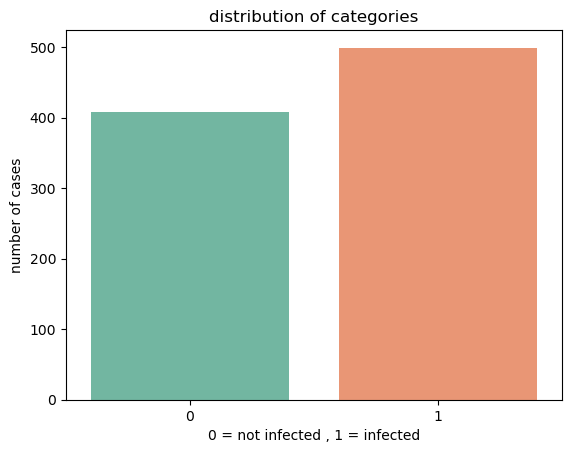

In [19]:
#رسم التوزيع العام للهدف
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.countplot(x='target', data=df , palette = 'Set2')
plt.title('distribution of categories')
plt.xlabel('0 = not infected , 1 = infected')
plt.ylabel('number of cases')
plt.show

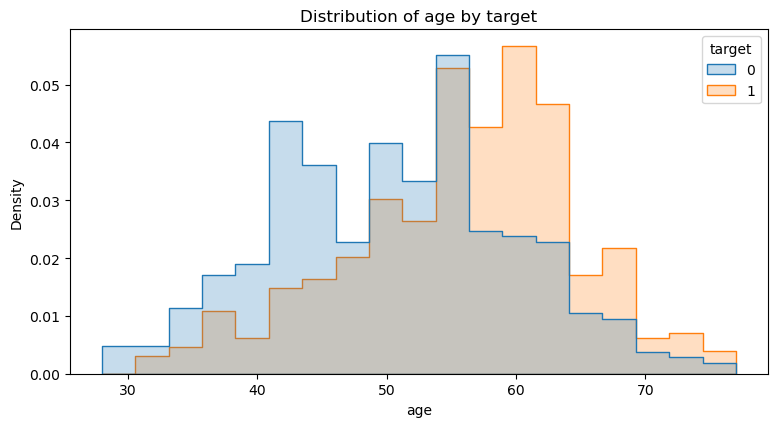

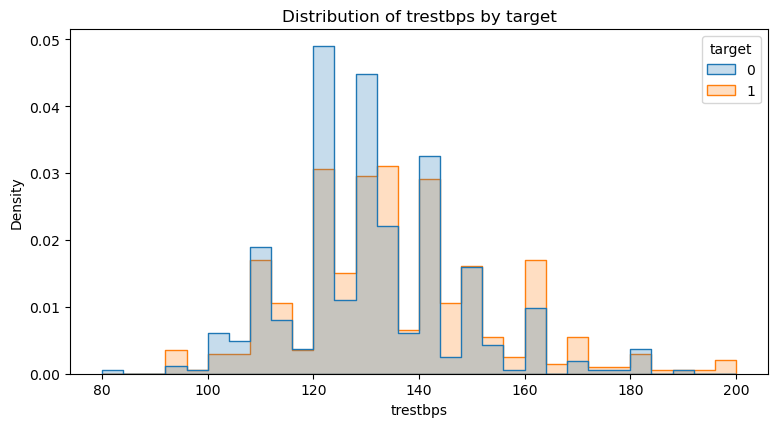

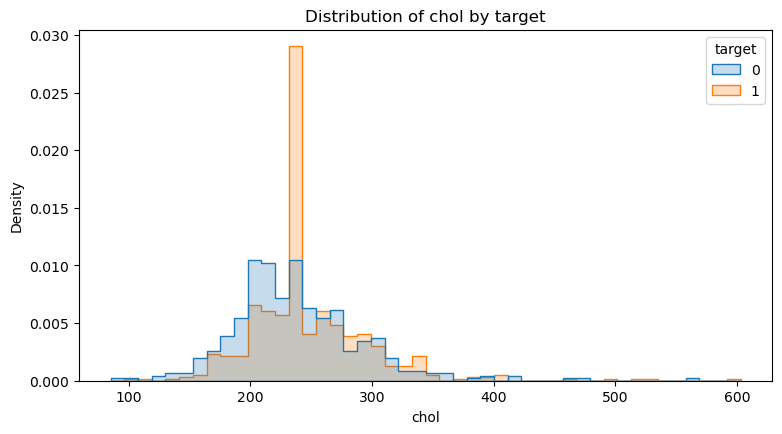

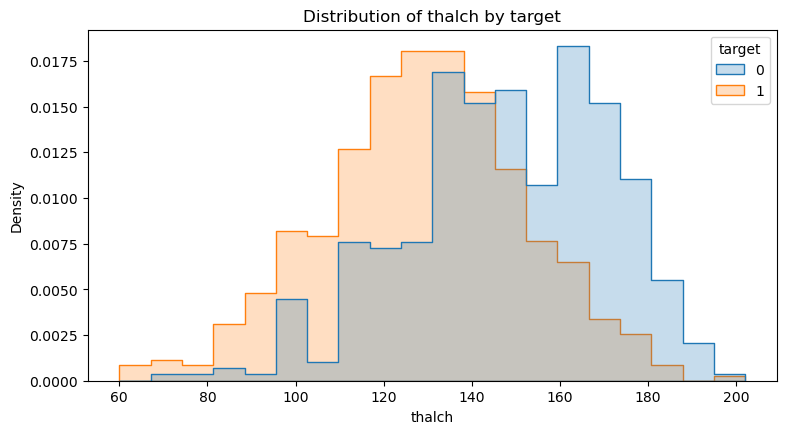

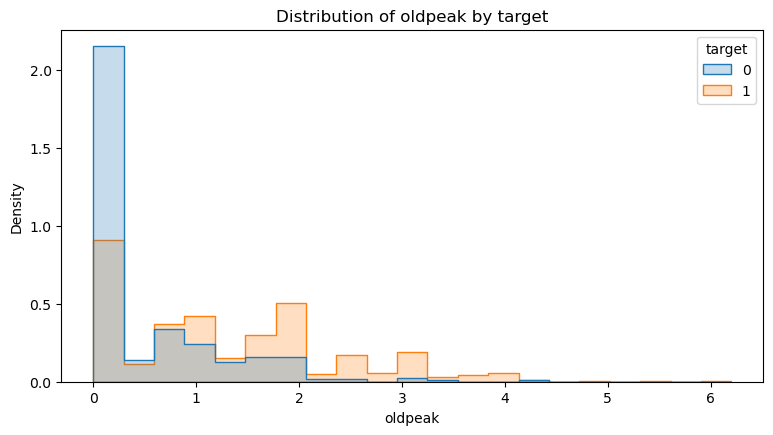

In [20]:
nuw_cols = ['age' , 'trestbps' , 'chol' , 'thalch' , 'oldpeak']
for i , cols in enumerate(nuw_cols , 1) :
    plt.figure(figsize=(15,12))
    plt.subplot(3,2,i)
    sns.histplot(hue='target' , x = cols, data = df , element = 'step' , stat = 'density' , common_norm = False)
    plt.title(f'Distribution of {cols} by target')
    plt.tight_layout()
    plt.show

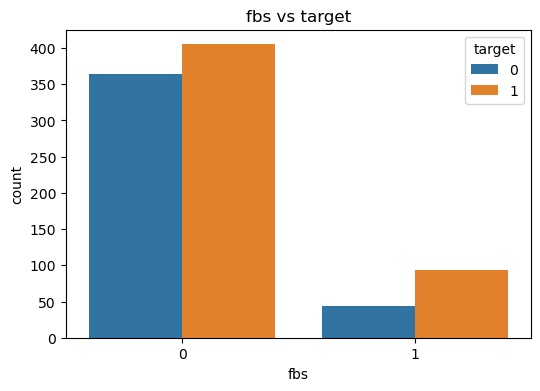

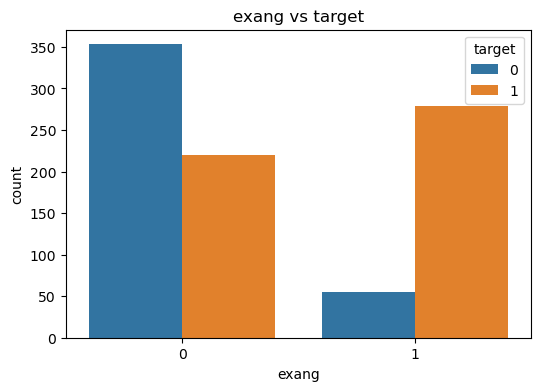

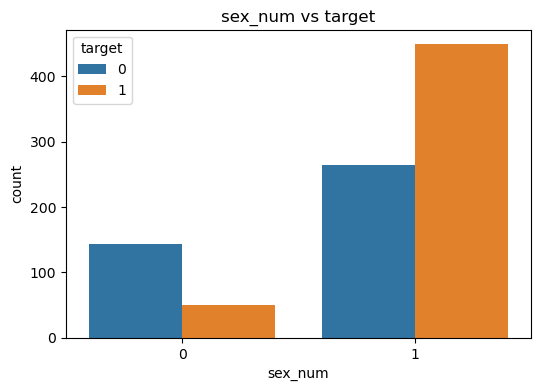

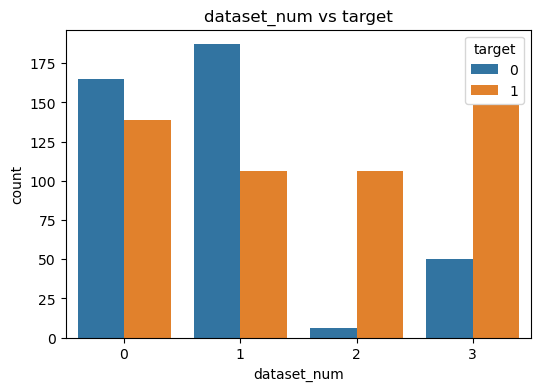

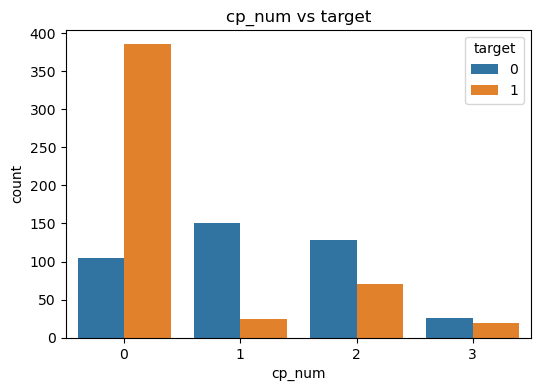

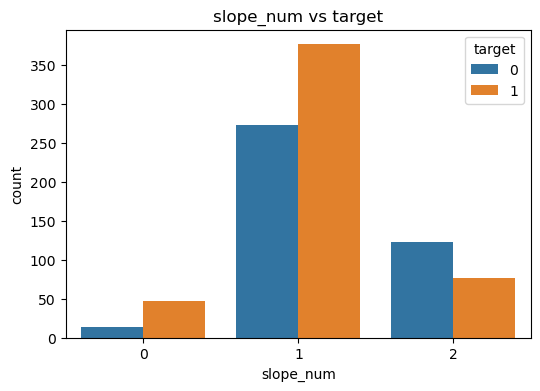

In [21]:
cat_cols = ['fbs','exang','sex_num','dataset_num','cp_num','slope_num']
for cols in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cols , hue = 'target' , data = df )
    plt.title(f'{cols} vs target')
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

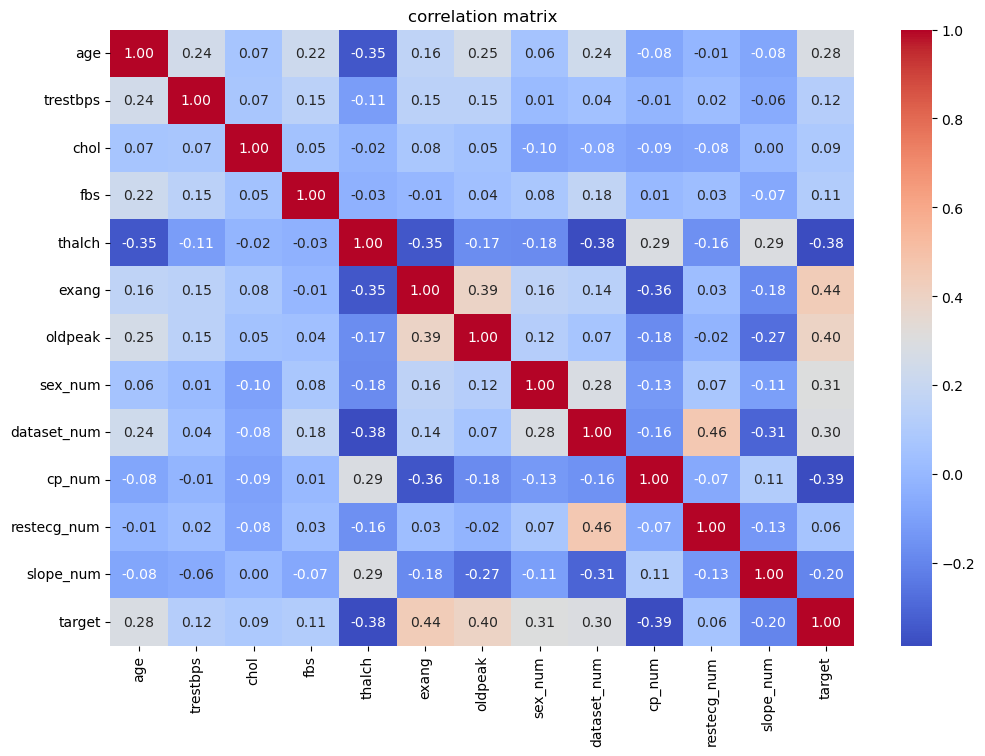

In [22]:
plt.figure(figsize=(12,8))
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap = 'coolwarm' , fmt = ".2f")
plt.title('correlation matrix')
plt.show

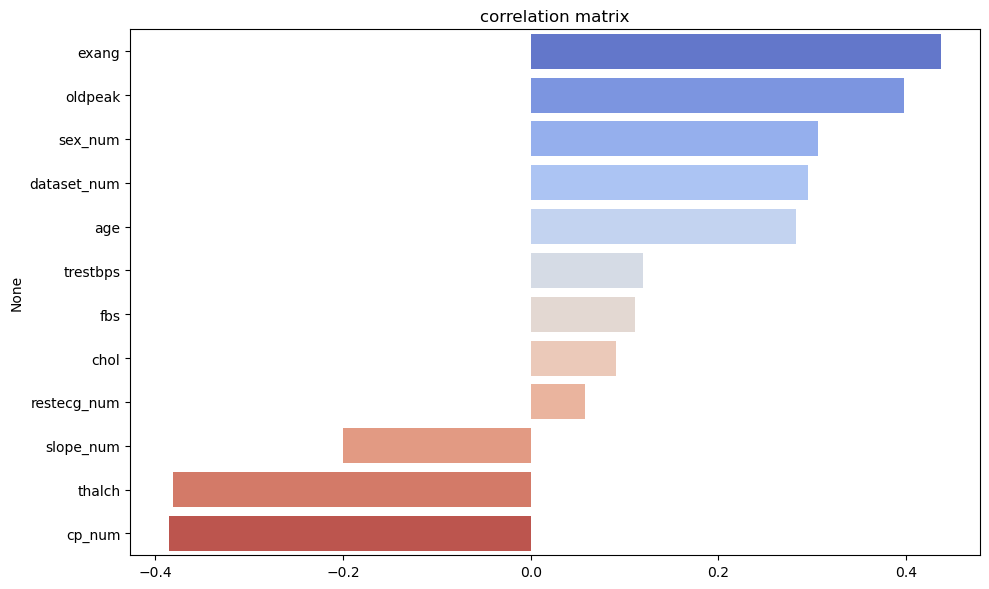

In [23]:
correlation = df.corr(numeric_only = True)
correlation = correlation['target'].drop('target').sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = correlation.values , y = correlation.index, palette = 'coolwarm')
plt.title('correlation matrix')
plt.tight_layout()
plt.show()

In [24]:
df.to_csv('cleaned heart_disease_uci' , index = False)